# Support Vector Machine in Primal/ Natural Form

### Natural form of SVM as an Alternative to the Lagrangian Formulation, and the Need for this Alternative Formulation

The original primal problem to solve in SVM is<br>


$\min \frac{1}{2}{||w||}^{2}$  s.t.   $ 1 -  (y^{i} . ( w^{T}.x^{i} + b ) ) \leq 0 ,  i = 1, 2, ....., N$ <br>

where $w$ are the weights of the classifier, $b$ is the bias term, $i$ refers to each training sample and there are N training samples. <br>

The dual form of this primal problem is 
$\max \alpha \sum_{i=1}^{N} \alpha_{i} - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y^{i}y^{j} x^{i^{T}}x^{j}$  s.t.  $\alpha_{i}\geq 0 \enspace$and$\enspace\sum_{i=1}^{N} \alpha_{i}y^{i} = 0$, $i = 1, 2, ....., N$ <br>

However, these primal and dual formulations of SVM assume that the data is (a)linearly-separable and (b)all samples lie on their corresponding sides of the margin (not just the boundary). The constraint of the primal makes sure that for each sample $i$, there is a functional margin of at least 1.


However, to handle outliers such that the samples could lie outside their margins (could be on the correct side of the boundary or not), we introduce, for each sample $i$, a variable $\zeta_{i}$ and allow the functinal margin in the constraint to be less than (even negative sometimes) 1. Note that if this $\zeta_{i}$ is negative for a sample, it menas that it lies on the wrong side of the boundary since the functional margin is supposed to be at least 1.$ This allows for the violation of the condition (b) mentioned above. Thus, our primal problem becomes<br>

$\min \frac{1}{2}{||w||}^{2}$  s.t.   $ 1 -  (y^{i} . ( w^{T}.x^{i} + b ) ) \leq 0 ,  i = 1, 2, ....., N$ <br>
or, $\min \frac{1}{2}{||w||}^{2}$  s.t.   $ 1 \leq  (y^{i} . ( w^{T}.x^{i} + b ) ) ,  i = 1, 2, ....., N$ <br>
or, $\min \frac{1}{2}{||w||}^{2}$  s.t.   $ (y^{i} . ( w^{T}.x^{i} + b ) )  \geq 1 ,  i = 1, 2, ....., N$ <br>
After introducing $\zeta_{i}$ for each sample $i$
or, $\min \frac{1}{2}{||w||}^{2}$  s.t.   $ (y^{i} . ( w^{T}.x^{i} + b ) )  \geq 1 - \zeta_{i} ,  i = 1, 2, ....., N$, $\zeta_{i} \geq 0$ <br>

However, condition (a) that the data is linearly-separable still holds. When the data is not linearly separable, (if not applying any trasnformation to the data set to make it lineary-separable in a higher dimension), we can introduce a penalty term in the primal objective such that if a sample is on the wrong side of the boundary defined by the current $w$ and $b$, we can penalize this SVM model. Note that this misclassification happens for a sample $i$ is for this particular sample, $\zeta_{i}$ is greater than or equal to 1. We can add a penalty of 1 for each misclassification essentially making the new primal objective <br>
or, $\min \frac{1}{2}{||w||}^{2} + \sum_{i=1}^{N} I(\zeta_{i} \geq 1)$  s.t.   $ (y^{i} . ( w^{T}.x^{i} + b ) )  \geq 1 - \zeta_{i} ,  i = 1, 2, ....., N$ , $\zeta_{i} \geq 0$<br>

However, this added penalty term is not convex and also not all misclassifications are equally wrong since some samples could be just a tiny bit into the wrong side of the boundary in comparison to other misclassified samples. Hence, instead, 
we replace this misclassification penalty with an approximation using $\zeta_{i}$ which is essentially the degree in terms of the functional margin by which this particular sample did not make it to the desired side of the margin. Hence, the primal becomes<br>
or, $\min \frac{1}{2}{||w||}^{2} + \sum_{i=1}^{N} \zeta_{i} $  s.t.   $ (y^{i} . ( w^{T}.x^{i} + b ) )  \geq 1 - \zeta_{i} ,  i = 1, 2, ....., N$, $\zeta_{i} \geq 0$ <br>

Notice that the first term in the primal objective tries to maximize the margin since smaller the w norm, larger the margin. The second term, on the other hand, focuses on minimizing the misclassification. Hence, we can introduce a hyperparameter $C$, called as the slack penalty, than can be used as a tradeoff factor between these two objectives of the primal. Hence, the primal objective now becomes<br>
or, $\min \frac{1}{2}{||w||}^{2} + C\sum_{i=1}^{N} \zeta_{i} $  s.t.   $ (y^{i} . ( w^{T}.x^{i} + b ) )  \geq 1 - \zeta_{i} ,  i = 1, 2, ....., N$, $\zeta_{i} \geq 0$ <br>

This problem can be rewritten as<br>
or, $\min \frac{1}{2}{||w||}^{2} + C\sum_{i=1}^{N} max (\,0, 1 -  (y^{i} . ( w^{T}.x^{i} + b ) )\, ) ,  i = 1, 2, ....., N$ <br>
Notice that the $\zeta_{i} terms disappear in this new form.$ Using max(0,...) ensures that the summation term is either 0 or positive, thus satisfying the constraint $\zeta_{i} \geq 0$. Also, $\sum_{i=1}^{N} max (\,0, 1 -  (y^{i} . ( w^{T}.x^{i} + b ) )\, )$ in the objective is the empirical hinge loss. <br>

This new objective is a nice convex function which will come handy below.

#### Why care about this alternative formulation of SVM when we have Lagrangian formulation that can be solved using a quadratic solver?<br>
Given a contraint optimization problem (such as the dual form of our SVM), a solver software finds the optimal parameters of the objective based on the training data samples provided. However, while doing so, if the number of training samples is large, the solver is very inefficient at doing so in terms of speed. Hence, if there were some way we could learn the optimal parameters for our SVM problem at hand (be it the primal or the dual) such that it were not affected in performance by the number of training examples available, it would be great. Turns out, the primal objective that we derived above is a nice convex function. Since it is a convex function, the global optima exists and can be found out using gradient descent (stochastic gradient descent in case the number of training samples is large). Thus, when the number of training samples is high and the solver becomes less efficient, this natual form of the SVM can be used as an alternative. This natural form also allows us for online learning.








<br>
This notebook is insprired from different sources including, but not limited to,
Stanford University, Mining of Massive Datasets, SVMs: Soft-Margin SVMs  by Leskovec, Rajaraman, and Ullman


### Iris Species Classification
The Iris data set contains sepal and petal lengths and widths for 50 samples each from three different species of Iris flowers. This data set was first presented by  R.A. Fisher in his 1936 paper The Use of Multiple Measurements in Taxonomic Problems. Only the class Iris Setosa is linearly-separable from the other two classes Iris Versicolor and Iris Virginica. For the sake of simplicity, we will merge the other two classes into one. The data set can be found [here](https://www.kaggle.com/uciml/iris). 

## Import Libraries

In [225]:
import time
import math
import copy
import numpy as np
import sys
import copy
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

import seaborn as sns
import matplotlib.pyplot as plt     


In [226]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


## Preprocessing Module

In [227]:
class Preprocessing:
    def __init__(self):
        self.numerical_features_name_list_including_labels = None
        self.categorical_features_namelist = None
        #self.scaler_used_for_features = scaler_used_for_features
        self.labels = None
    
    
    
    
    #Custom train_test_split indices generator
    def train_test_split_indices(self, len_data, test_split_size):
        
        #Note that if a sample is to be dropped because of too many missing features, it should be done before this step.
        np.random.seed(42)
        shuffled_data_indices = np.random.permutation(len_data)
        total_test_data = int(test_split_size * len_data)
        testing_indices = shuffled_data_indices[:total_test_data]
        training_indices = shuffled_data_indices[total_test_data:]
        return training_indices, testing_indices
    
    
    def set_numerical_and_categorical_feature_names(self, dataframe):
        
        #get the names of the numeric feature columns only
        self.numerical_features_name_list_including_labels = dataframe.select_dtypes(include=np.number).columns.tolist()
        #get the names of the categorical feature columns only
        list_of_categorical_feature_names = []
        for feature in dataframe.columns:
            if dataframe.dtypes[feature] == "object":
                
                list_of_categorical_feature_names.append(feature)
        self.categorical_features_namelist = list_of_categorical_feature_names
        

## Primal SVM Implementation with Gradient Descent

## Execution begins.

In [228]:


class Primal_SVM(BaseEstimator, ClassifierMixin):
    '''
    Implementation of Vanilla Support Vector Machine algorithm in its natural form.
    
    Parameters
    -------------
    c : float, optional, default 1.0
        The slack penalty, a tradeoff between maximizing the margin and minimizing the classification errors.
    learning_rate : float, optional, default 0.001
                    The step size to update the parameters of the model with at each update.
    kernel : kernel object, optional, default None
             The type of kernel object used by this SVM        
    max_epochs : int, optional, default 100
                 The number of training iterations to perform by the SVM object.
    
    '''
    
    def __init__(self, learning_rate = 0.001, c = 0.0, kernel = None, max_epochs = 10):
        self.c = c
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.max_epochs = max_epochs
        
        self.bias_ = 0
        
        #maintain a dictionary to store the weights computed at the end of each epoch of training
        self.weights_dict = {}
        self.bias_dict = {}
        
        
        
    
    
    
    
    def fit(self, X, y = None):

        '''
        Trains SVM in its primal form using gradient descent instead of convex optimization.
        
        Parameters
        ----------------
        X : arraylike
            The training samples in 2D format, corresponding to input features of each sample
            to train the vanilla SVM model in its natural form.
        y : arraylike, optional, default None
            The labels for each sample in X. Some algorithms do not require the label y while some (like SVM) do.
            Hence, keep y as optional.
        
        Returns
        ----------------
        self : Trained Primal_SVM object
               This method returns self for compatibility reasons with sklearn's other interfaces/ functionalities.
         
        '''
        # 1.check that the estimator's hyperparameters are set correctly.
        assert type(self.c) == float or type(self.c) == int, "Data type of parameter c is invalid."
        assert self.c >= 0 and self.c <= sys.maxsize, "Value of parameter c is out of possible range."
        assert self.max_epochs > 0 and self.max_epochs <= sys.maxsize, "Value of max epochs is invalid."
        
        # 2.check the shape of X, it should be a 2D array to be compatible with sklearn methods later
        #This is done by default in _validate_data() method of Base Estimator
#         X = self._validate_data(X)
#         if y is not None:
#             y = self._validate_target(y)
            
        
        
        # 3.perform the trianing of SVM here. Here, we will use SGD instead of BGD or MBGD.
        self.weights_ = np.random.normal(0, 1, X.shape[-1])
        
        
        iters = 0
        np.random.seed(42)
        for iter in range(0,self.max_epochs):           
            
            #shuffle the indices for random updates at each epoch during Stochastic Gradient Descent update
            random_indices_ = [idx for idx in range(0, X.shape[0])]
            random.shuffle(random_indices_)
            
            for index_ in range(0,len(random_indices_)):
                
                gradient_w = None
                gradient_b = None
                #calculate the gradient of the cost wrt to each parameter/ weight and bias
                #There are two parts to our gradient.
                gradient_w_1 = self.weights_ #first part is wj for each feature j, which when taken all components at once is w itself.
                
                gradient_w_2 = None
                
                
                
                if y.iloc[random_indices_[index_]].values[0] * (np.dot(self.weights_, X.iloc[random_indices_[index_]].values) + self.bias_) >= 1:
                    gradient_w_2 = 0
                    gradient_b = 0
                else:
                    
                    gradient_w_2 = -1 * ( y.iloc[random_indices_[index_]].values[0] * X.iloc[random_indices_[index_]].values)
                    gradient_b = -1 * y.iloc[random_indices_[index_]].values[0]
                
                
                    
                                    
                
                gradient_w = gradient_w_1 + gradient_w_2
                  
                
                #update the parameters/ weights
                self.weights_ = self.weights_ - self.learning_rate * (self.weights_ + (self.c * gradient_w))
                self.bias_ = self.bias_ - self.learning_rate * (self.c * (gradient_b))
                
                
                
                                                                    
   
            #update the iteration count
            iters += 1
            
            #save the weights obtained at the end of the current iteration
            
            
#             copy_of_weights = copy.deepcopy(self.weights_)
#             copy_of_bias = copy.deepcopy(self.bias_)
            self.weights_dict[iter] = self.weights_
            self.bias_dict[iter] = self.bias_
            
            
            
        
        #return self for compatibility reasons with sklearn's other interfaces.
        return self
       
        
    def predict_a_sample(self, X):
        #SVM classifies using the sign of (WX + b)
        prediction_val = np.dot(X, self.weights_dict[self.max_epochs-1]) + self.bias_dict[self.max_epochs-1]
        
        
        
        if prediction_val >= 0:
            return 1
        else:
            return -1
        
        
    def predict_proba(self, X):
        pass
    
    
        

In [229]:
path = r"C:\Users\Being_Aerys\PycharmProjects\Machine_Learning_Algorithms_Collection\Supervised_Methods\Support_Vector_Machines\data\Iris.csv"
raw_data = pd.read_csv(path, sep = ",")
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [230]:
#lets see what unique classes are present.
raw_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [231]:
#Convert the class labels into +1 and -1 as required by the SVM for mathematical ease

raw_data = raw_data.replace(["Iris-setosa"],1)
raw_data = raw_data.replace(["Iris-versicolor", "Iris-virginica"],-1)
raw_data = raw_data.drop("Id", 1)
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [232]:
#maintain a fresh copy of the data set for future use
copy_of_raw_data = copy.deepcopy(raw_data)

In [233]:
preprocessing = Preprocessing()

training_indices, testing_indices = preprocessing.train_test_split_indices(len(raw_data), 0.2)
train_set, test_set = raw_data.iloc[training_indices], raw_data.iloc[testing_indices]
preprocessing.set_numerical_and_categorical_feature_names(train_set)

train_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,4.6,3.6,1.0,0.2,1
15,5.7,4.4,1.5,0.4,1
65,6.7,3.1,4.4,1.4,-1
11,4.8,3.4,1.6,0.2,1
42,4.4,3.2,1.3,0.2,1


In [234]:
#As seen above, the data set indices have changed and we should reset the indices for ease.
train_set.reset_index(inplace = True)
train_set = train_set.drop("index", 1)
train_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.6,1.0,0.2,1
1,5.7,4.4,1.5,0.4,1
2,6.7,3.1,4.4,1.4,-1
3,4.8,3.4,1.6,0.2,1
4,4.4,3.2,1.3,0.2,1


In [235]:
#Separate training features and labels
train_features = train_set[train_set.columns[~train_set.columns.isin(["Species"])]]
train_labels = pd.DataFrame(train_set["Species"]) #convert to dataframe since a single column becomes a pandas Series

In [236]:
#Summarize the information of the training set
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
SepalLengthCm    120 non-null float64
SepalWidthCm     120 non-null float64
PetalLengthCm    120 non-null float64
PetalWidthCm     120 non-null float64
dtypes: float64(4)
memory usage: 3.8 KB


In [237]:
#Lets instantiate the SVM estimator that we defined and train the model using the training set.
hard_primal_svm = Primal_SVM()

### Train

In [238]:
#fit SVM using the training set
hard_primal_svm.fit(X = train_features, y = train_labels)

Primal_SVM(c=0.0, kernel=None, learning_rate=0.001, max_epochs=10)

### Predict

In [239]:
#Separate training features and labels
test_features = test_set[test_set.columns[~test_set.columns.isin(["Species"])]]
test_labels = pd.DataFrame(test_set["Species"]) #convert to dataframe since a single column becomes a pandas Series
test_labels.reset_index(inplace = True)
test_labels = test_labels.drop("index", 1)
test_labels

,Species
0,-1
1,1
2,-1
3,-1
4,-1
5,1
6,-1
7,-1
8,-1
9,-1


In [240]:
test_preds = []
for idx in range(0, len(test_features)):
    
    test_preds.append(hard_primal_svm.predict_a_sample(X =test_features.iloc[idx] ))


In [241]:
test_preds = pd.DataFrame(test_preds)

In [242]:
combined = test_labels
combined

,Species
0,-1
1,1
2,-1
3,-1
4,-1
5,1
6,-1
7,-1
8,-1
9,-1


In [243]:
combined = combined.rename(columns={"Species": "true_values",})


In [244]:
combined = combined.assign(predicted_values = test_preds)

In [245]:
combined

,true_values,predicted_values
0,-1,-1
1,1,-1
2,-1,-1
3,-1,-1
4,-1,-1
5,1,-1
6,-1,-1
7,-1,-1
8,-1,-1
9,-1,-1


#### As seen above, all the predictions are -1 which is not true. This resulted because of the data set is inherently not linearly separable. Hence a hard margin SVM will do very bad in this situation. Let's assess the accuracy of the model.

In [246]:
assert len(test_labels) == len(test_preds)


In [247]:
test_accuracy_individual = [1 if combined["true_values"].values[idx] == combined["predicted_values"].values[idx] else 0 for idx in range(0,len(combined))]

In [248]:

test_accuracy = (sum(test_accuracy_individual)/ len(test_preds)) * 100
test_accuracy

66.66666666666666

### Confusion Matrix

In [249]:
labels_in_sorted_order = [-1,1] # Species in sorted order --> -1, 1
conf_matrix = metrics.confusion_matrix(test_labels, test_preds, labels_in_sorted_order)
conf_matrix

array([[20,  0],
       [10,  0]], dtype=int64)

[Text(0, 0.5, '-1'), Text(0, 1.5, '1')]

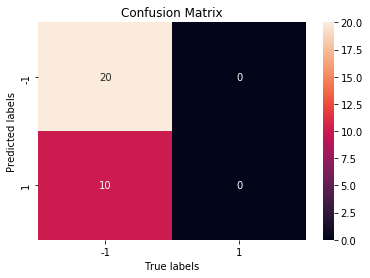

In [250]:
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels_in_sorted_order)
ax.yaxis.set_ticklabels(labels_in_sorted_order)

### Soft-Margin SVM in Primal Form<br>
If we allow the model to use a soft margin (and equivalently trade-off between large margin and less classification error), the model might do better. For this, lets set the c parameter to 2 instead of the default 0 in our SVM. Note: c is a hyperparameter to tune.

In [258]:
#Lets instantiate the SVM estimator that we defined and train the model using the training set.
soft_svm = Primal_SVM(c  = 2)

In [259]:
#fit SVM using the training set
soft_svm.fit(X = train_features, y = train_labels)

Primal_SVM(c=2, kernel=None, learning_rate=0.001, max_epochs=10)

In [260]:
#Separate training features and labels
test_features = test_set[test_set.columns[~test_set.columns.isin(["Species"])]]
test_labels = pd.DataFrame(test_set["Species"]) #convert to dataframe since a single column becomes a pandas Series
test_labels.reset_index(inplace = True)
test_labels = test_labels.drop("index", 1)
test_labels




,Species
0,-1
1,1
2,-1
3,-1
4,-1
5,1
6,-1
7,-1
8,-1
9,-1


In [261]:
test_preds = []
for idx in range(0, len(test_features)):
    
    test_preds.append(soft_svm.predict_a_sample(X =test_features.iloc[idx] ))


In [262]:
test_preds = pd.DataFrame(test_preds)
combined = test_labels
combined = combined.rename(columns={"Species": "true_values",})
combined = combined.assign(predicted_values = test_preds)
assert len(test_labels) == len(test_preds)
test_accuracy_individual = [1 if combined["true_values"].values[idx] == combined["predicted_values"].values[idx] else 0 for idx in range(0,len(combined))]
test_accuracy = (sum(test_accuracy_individual)/ len(test_preds)) * 100


In [263]:
labels_in_sorted_order = [-1,1] # Species in sorted order --> -1, 1
conf_matrix = metrics.confusion_matrix(test_labels, test_preds, labels_in_sorted_order)
conf_matrix

array([[20,  0],
       [ 0, 10]], dtype=int64)

[Text(0, 0.5, '-1'), Text(0, 1.5, '1')]

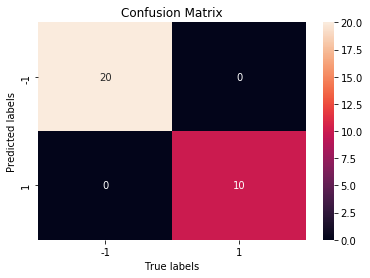

In [264]:
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels_in_sorted_order)
ax.yaxis.set_ticklabels(labels_in_sorted_order)

As seen above, the soft-margin SVM correctly classified all the test samples. Here, the value of c should be chosen using hyperparameter search technique, e.g., grid search.